<a href="https://colab.research.google.com/github/jplavorr/Data-Science/blob/main/Analisando_os_Dados_do_Airbnb_N_Y.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *New York*

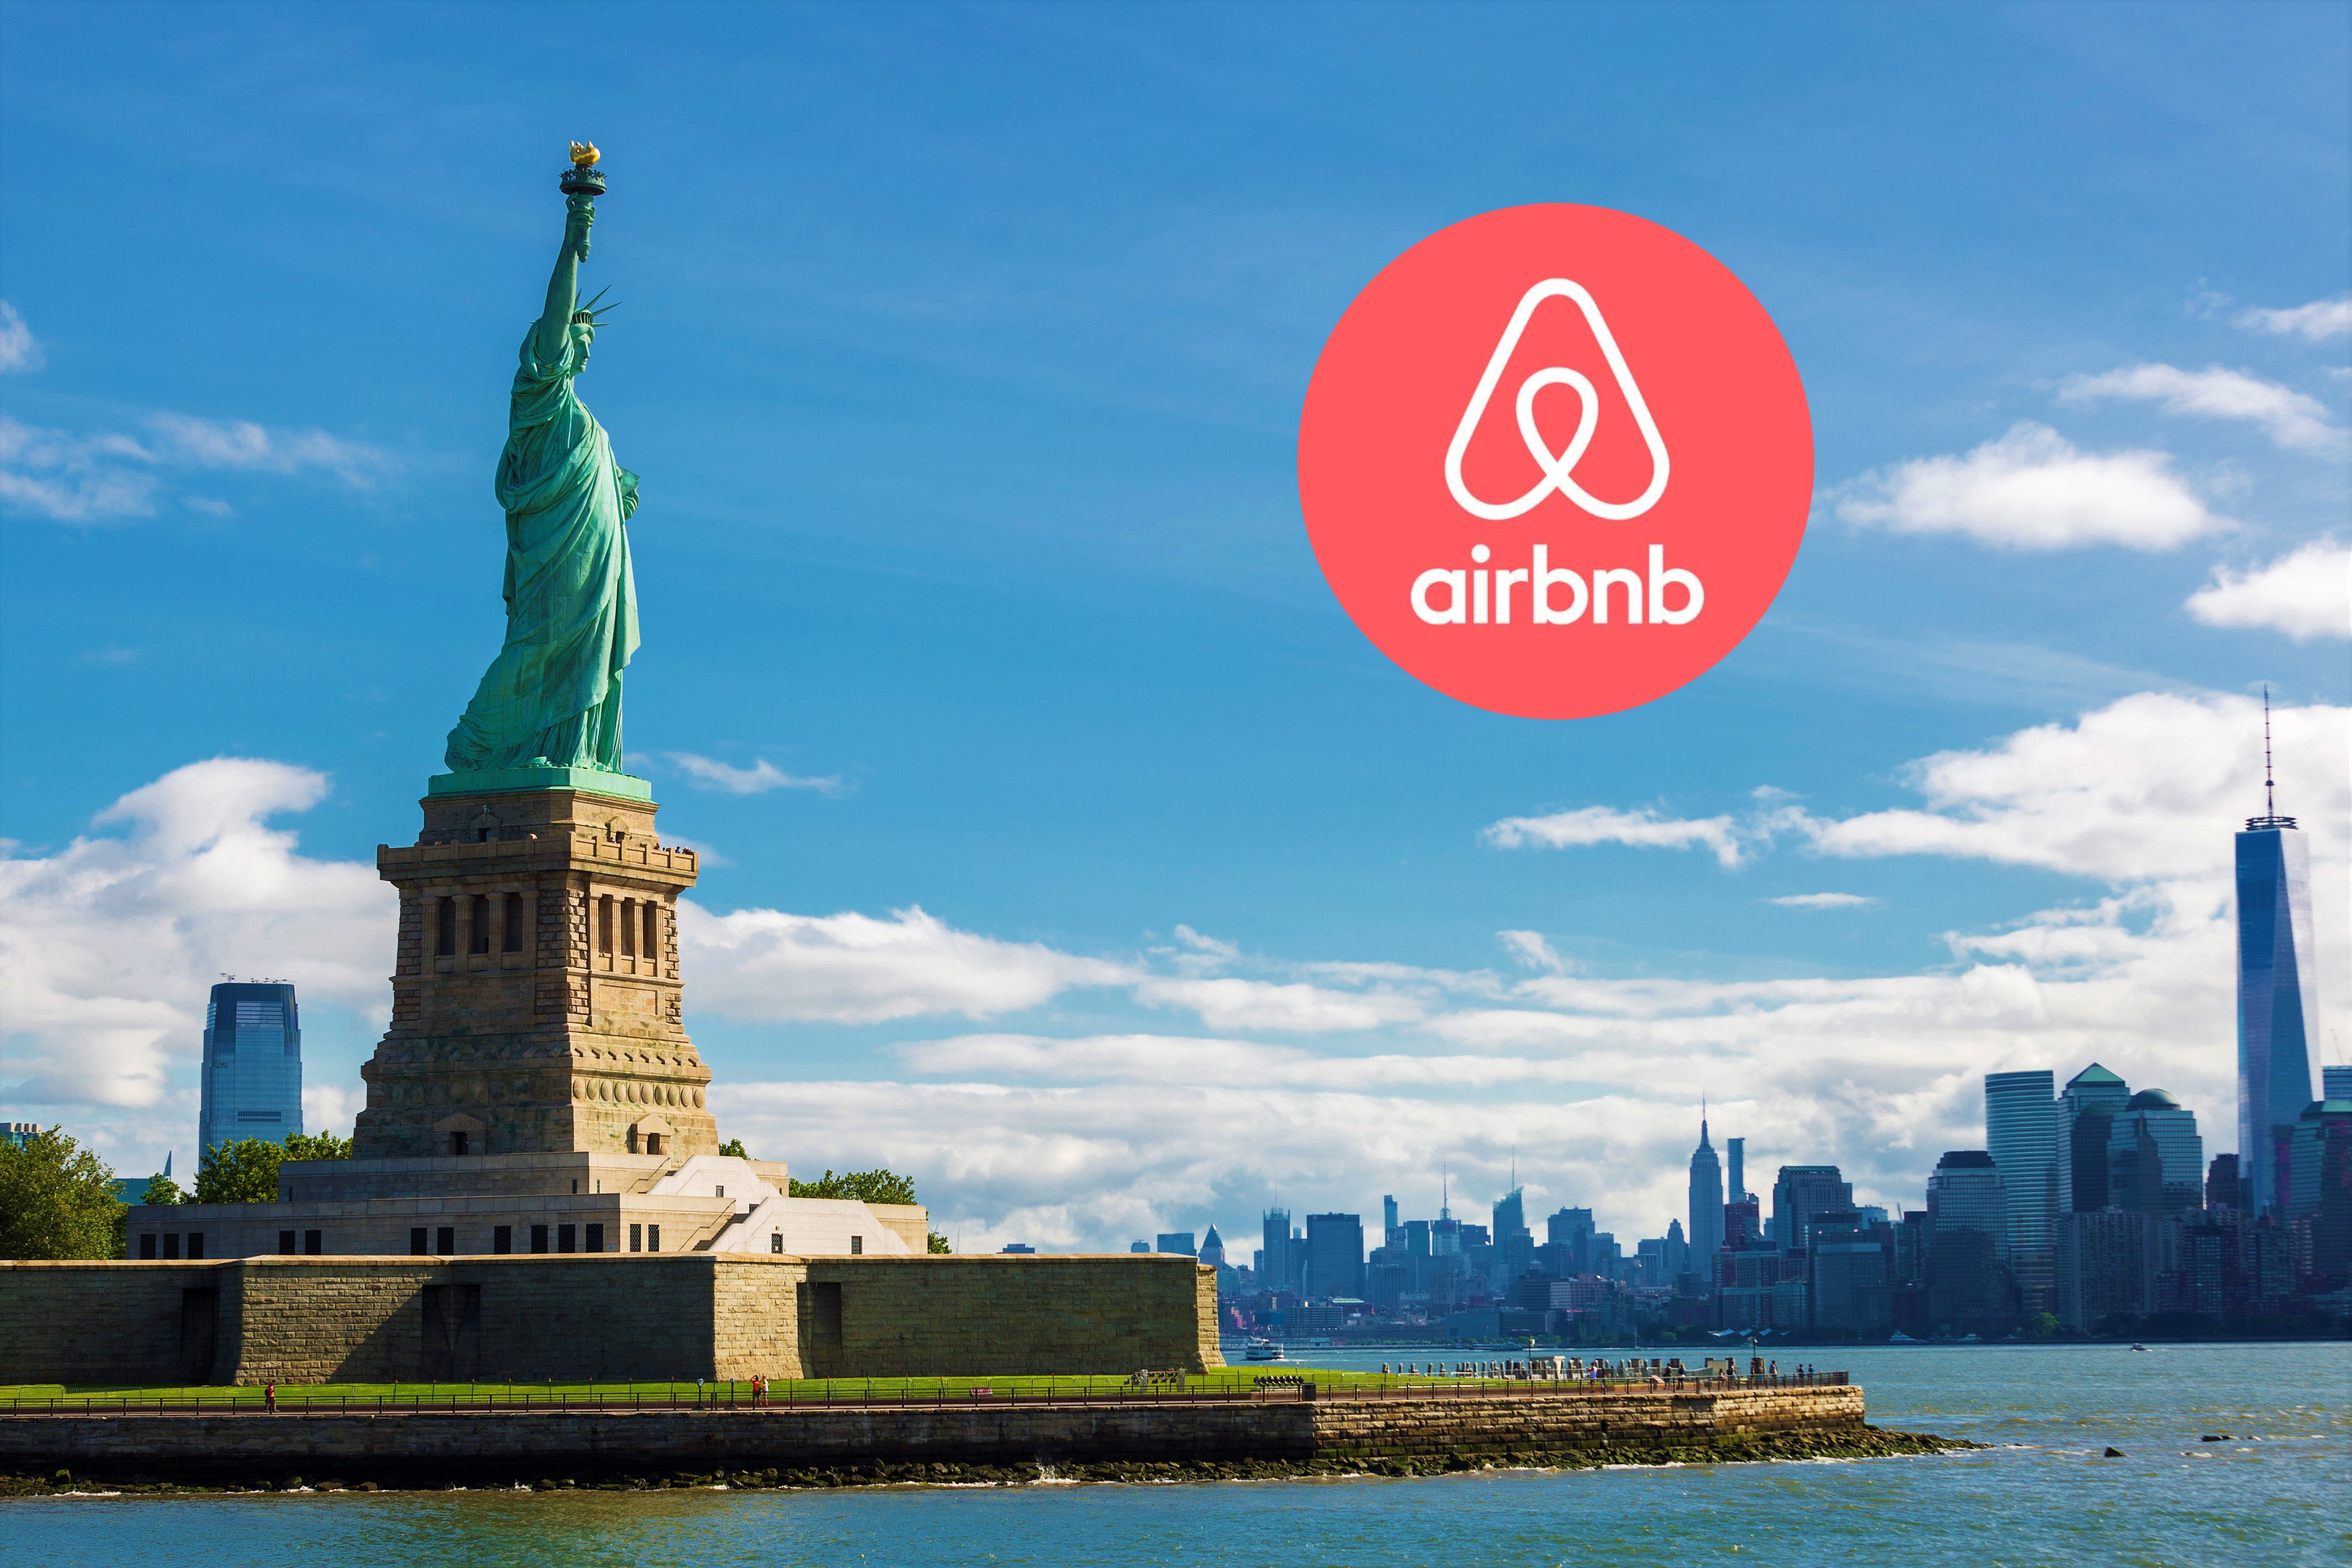


Você provávelmente já conhece o [Airbnb](https://www.airbnb.com.br/), uma Startup fundada 10 anos atrás, e hoje é uma das **maiores empresas hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

O Airbnb faz a ponte das pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, e ainda oferece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Nova Iorque, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

New York é uma das maiores cidades do mundo, palco de inúmeros eventos  que mudaram nossa história e também é cenário de diversos filmes e seriados americanos. New York se encontra como um dos principais destinos de viagem, adoraria conhecê-la quando tiver a chance. Para essa análise obtive os dados a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in New York (good for visualisations).*



In [86]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [87]:
# importar o arquivo listings.csv da cidade de Nova York para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2020-12-10/visualisations/listings.csv")


## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - Boroughs de Nova Iorque
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel por dia.
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,30,48,2019-11-04,0.36,2,365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,74,1,375,2020-11-22,4.97,1,307
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,30,50,2019-12-02,0.36,1,365
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76468,-73.98315,Private room,65,2,474,2020-09-25,3.36,1,0
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,75,2,118,2017-07-21,0.86,1,0


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos identificar a quantidade de entradas do nosso DataSet possui e o tipo de cada coluna.

In [5]:
# identificar o volume de dados do DataFrame
print('Entradas:\t{}'.format(df.shape[0]))
print('Entradas:\t{}\n'.format(df.shape[1]))


# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	36923
Entradas:	16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Uma quantidade de valores ausentes muito grande pode prejudicar nossa análise. É importante avaliarmos se esses valores ausentes são significativos comparado ao total de entradas.

* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em aproximadamente 25% das linhas.
* As variáveis `name` e `host_name` têm menos que 0,1% dos valores nulos.

In [81]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)


reviews_per_month                 0.254151
last_review                       0.254151
name                              0.000352
host_name                         0.000244
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Histograma é uma ótima maneira de visualizar como as variáveis estão distribuídas.

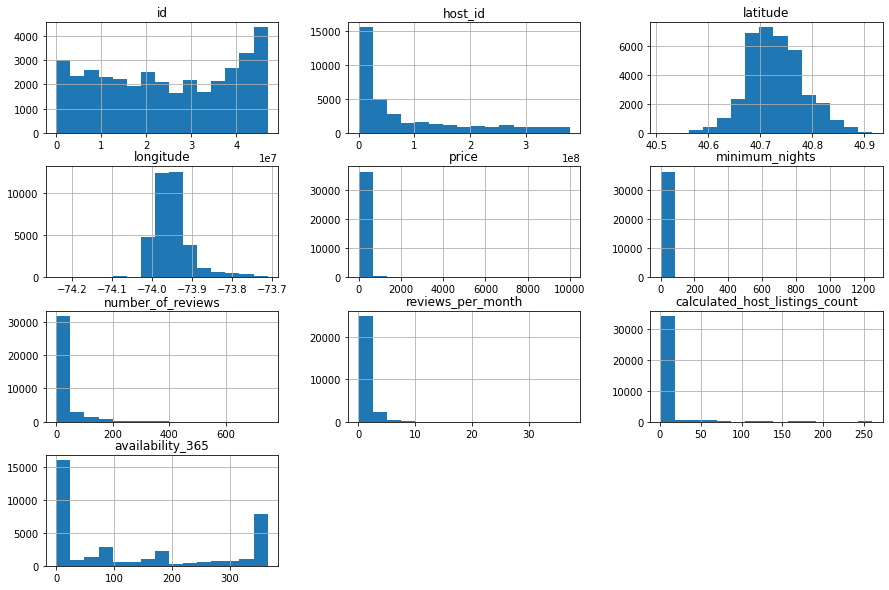

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há outliers presentes?** 

Pela distribuição do histograma, é possível verificar indícios da presença de outliers. Por exemplo, olhe a coluna `minimum_nights` que vai até $1200$. 

Outliers são valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,36923.000000,36923.000000,36923.000000,27539.000000,36923.000000,36923.000000
mean,145.921187,23.674647,23.182298,0.892762,8.947946,134.103513
std,268.388200,26.779132,48.066110,1.305804,31.080929,147.640898
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,61.000000,4.000000,0.000000,0.110000,1.000000,0.000000
50%,100.000000,30.000000,4.000000,0.370000,1.000000,77.000000
75%,159.000000,30.000000,21.000000,1.170000,2.000000,313.000000
max,10000.000000,1250.000000,748.000000,37.280000,260.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 159, porém seu valor máximo é 10000.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano e possui 75% do valor abaixo de 30 dias.



Existe uma forma prática de calcular a partir de qual número teremos a presença de outliers. Vamos fazer isso para definir um limite e limparmos nossos dados.


* Definir o Q1 (Valores abaixo de 25%) e Q3 (Valores abaixo de 75%) para as variáveis que serão limpas.

* Calcular IQR (Amplitude interquartil) para as variáveis.

* Definir o *limite superior* e *inferior* para cortar os outliers.

* Remover os *Outliers*.

In [92]:
#Primeiro Quartil
q1_price =  df.price.quantile(.25)
q1_min_nights =  df.minimum_nights.quantile(.25)

#Terceiro Quartil
q3_price = df.price.quantile(.75)
q3_min_nights =  df.minimum_nights.quantile(.75)

#Amplitude Interquartil
IQR_price = q3_price - q1_price
IQR_min_nights = q3_min_nights - q1_min_nights

print("IQR da variavel price é:{}\n".format(IQR_price))
print("IQR da variavel minimum_nights é:{}\n".format(IQR_min_nights))

#Definindo os limites
lim_sup_price = q3_price + 1.5*IQR_price
lim_inf_price = q1_price - 1.5*IQR_price

lim_sup_min_nights = q3_min_nights + 1.5*IQR_min_nights
lim_inf_min_nights = q1_min_nights - 1.5*IQR_min_nights

print('O limite superior da variavel price é:{}\n'.format(lim_sup_price))
print('O limite inferior da variavel price é:{}\n'.format(lim_inf_price))
print('O limite superior da variavel minimum_nights é:{}\n'.format(lim_sup_min_nights))
print('O limite inferior da variavel minimum_nights é:{}'.format(lim_inf_min_nights))



IQR da variavel price é:98.0

IQR da variavel minimum_nights é:26.0

O limite superior da variavel price é:306.0

O limite inferior da variavel price é:-86.0

O limite superior da variavel minimum_nights é:69.0

O limite inferior da variavel minimum_nights é:-35.0


Podemos ver que não possuímos outliers na parte inferior, pois não faz sentido falar em valores negativos para essas variáveis. Mas continuamos tendo valores iguais a zero, que precisam ser tratados.

#### Boxplot para minimum_nights e price

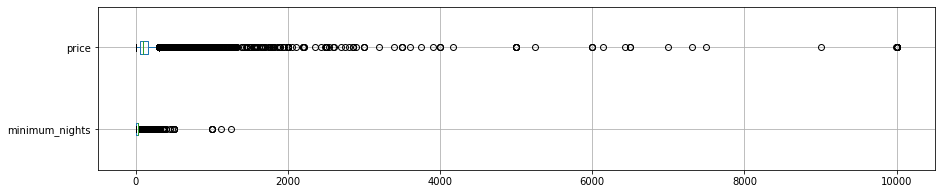

minimum_nights: valores acima de 69:
477 entradas
A porcentagem desses valores em relação ao DataSet:	1.2919%


price: valores acima de 306
2300 entradas
A porcentagem desses valores em relação ao DataSet:	6.2292%


In [26]:
#Plotar um boxplot
df.boxplot(['minimum_nights', 'price'], vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores a partir de 30 dias para minimum_nights
print("minimum_nights: valores acima de 69:")
print("{} entradas".format(len(df[df.minimum_nights > 69])))
print("A porcentagem desses valores em relação ao DataSet:\t{:.4f}%\n".format((len(df[df.minimum_nights > 69]) / df.shape[0])*100))

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 306")
print("{} entradas".format(len(df[df.price > 306])))
print("A porcentagem desses valores em relação ao DataSet:\t{:.4f}%".format((len(df[df.price > 306]) / df.shape[0])*100))



Todas essas 'bolinhas' apresentadas nos boxplots são *outliers*. Por isso o BoxPlot é uma ótima ferramenta para detectar a presença deles.

In [104]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 306].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 69].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights == 0].index, axis=0, inplace=True)

print('Shape antes da limpeza:{}'.format(df.shape))
print('Shape depois da limpeza:{}'.format(df_clean.shape))

Shape antes da limpeza:(36923, 16)
Shape depois da limpeza:(34169, 16)


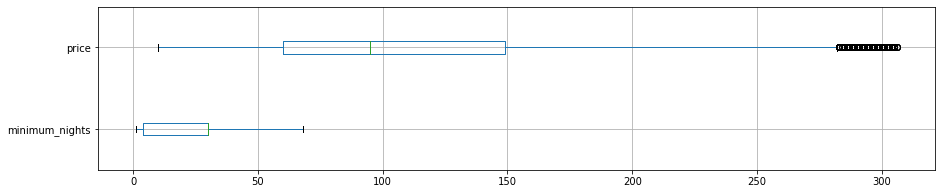

In [105]:
#Verificando o conjunto limpo
df_clean.boxplot(['minimum_nights', 'price'], vert=False, figsize=(15,3))
plt.show()

Aqui podemos ver o resultado da limpeza.

O boxplot mostra alguns dados como outliers na varável `price`, entretanto, esses estão sendo calculados em relação ao novo DataSet, e nossa limpeza levou em consideração os quartis do dado original.

Para garantir que não estamos lidando com outliers que possam prejudicar nossa análise, vamos plotar os histogramas novamente.

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma, para ter uma visão das distribuições sem interferência.

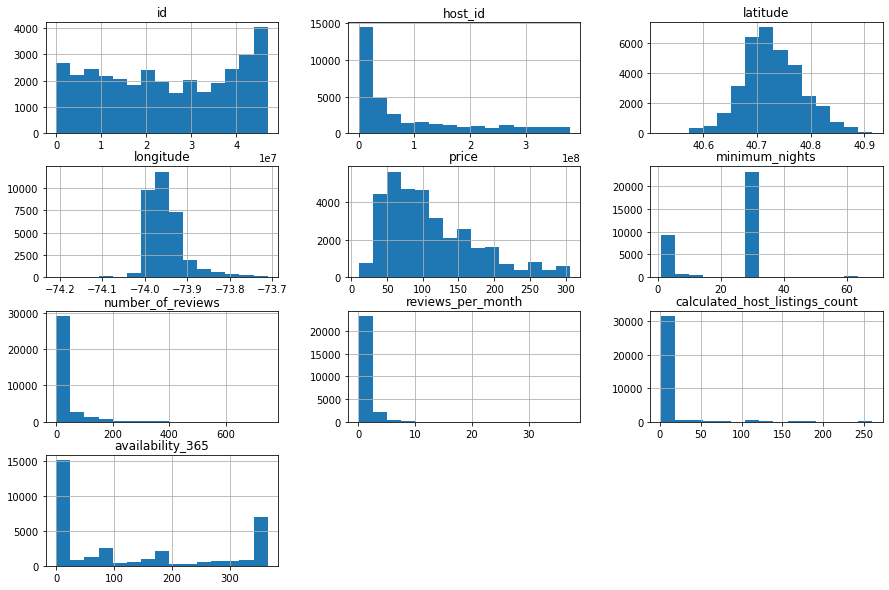

In [37]:
# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

Podemos ver, nas colunas `minimum_nights` e `price` tiveram uma grande mudança em sua distribuição, que podemos notar claramente com o uso dos histogramas. Para ter uma noção estatística dessa mudança, vamos plotar a média dessas variáveis com e sem a presença dos outliers.

### **Q4. Qual a média dos preços de aluguel ?**


In [93]:
# ver a média da coluna `price`
print('Media da coluna price sem outliers:{:.2f}\n'.format(df_clean['price'].mean()))
print('Media da coluna price com outliers:{:.2f}'.format(df['price'].mean()))

Media da coluna price sem outliers:109.71

Media da coluna price com outliers:145.92


### **Q4. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [89]:
# ver a média da coluna `minimum_nights`
print('Media da coluna minimum_nights sem outliers:{:.2f}\n'.format(df_clean['minimum_nights'].mean()))
print('Media da coluna minimum_nights com outliers:{:.2f}'.format(df['minimum_nights'].mean()))

Media da coluna minimum_nights sem outliers:21.79

Media da coluna minimum_nights com outliers:23.67


### **Q4. Qual a correlação existente entre as variáveis**
Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()


# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.019703,-0.041611,-0.058599,0.006100,0.030950
minimum_nights,0.019703,1.000000,-0.245791,-0.381040,0.124332,-0.147607
number_of_reviews,-0.041611,-0.245791,1.000000,0.705387,-0.101213,0.157805
reviews_per_month,-0.058599,-0.381040,0.705387,1.000000,-0.060807,0.206367
calculated_host_listings_count,0.006100,0.124332,-0.101213,-0.060807,1.000000,0.189588
availability_365,0.030950,-0.147607,0.157805,0.206367,0.189588,1.000000


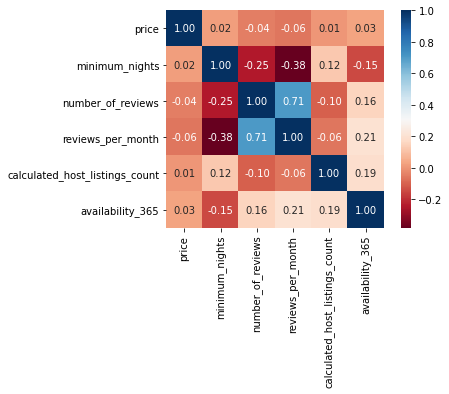

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Podemos ver através desse *Heatmap* que não há uma correlação presente entre a maioria das variáveis, apenas correlação fraca entre `number_of_reviews` e `reviews_per_month`.

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**
A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [94]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean['room_type'].value_counts()

Entire home/apt    17273
Private room       16077
Shared room          636
Hotel room           183
Name: room_type, dtype: int64

In [96]:
# mostrar a porcentagem de cada tipo de imóvel disponível
print(df_clean.room_type.value_counts() / df_clean.shape[0]) 

#Ou também podemos plotar assim:
print('\nA porcentagem de apartamento ou Casa inteira é:{:.4f}%\n'.format(df_clean['room_type'].value_counts().values[0]/ df_clean.shape[0]))
print('A porcentagem de quarto privado é:{:.4f}%\n'.format(df_clean['room_type'].value_counts().values[1]/ df_clean.shape[0]))
print('A porcentagem de quarto compartilhado é:{:.4f}%\n'.format(df_clean['room_type'].value_counts().values[2]/ df_clean.shape[0]))
print('A porcentagem de quarto de hotel é:{:.4f}%\n'.format(df_clean['room_type'].value_counts().values[3]/ df_clean.shape[0]))

Entire home/apt    0.505517
Private room       0.470514
Shared room        0.018613
Hotel room         0.005356
Name: room_type, dtype: float64

A porcentagem de apartamento ou Casa inteira é:0.5055%

A porcentagem de quarto privado é:0.4705%

A porcentagem de quarto compartilhado é:0.0186%

A porcentagem de quarto de hotel é:0.0054%



### **Q6. Qual a localidade mais cara de New York?**
Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.



In [109]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Woodrow              255.000000
Lighthouse Hill      200.000000
Belle Harbor         196.333333
Huguenot             180.000000
Tribeca              178.956140
DUMBO                172.607143
NoHo                 168.512821
Vinegar Hill         162.058824
West Village         161.821632
Greenwich Village    157.330396
Name: price, dtype: float64

Acima, vemos que bairros como Belle Harbor, Willowbrook e Tottenville, estão com média de preço bem superior a bairros como SoHo e Tribeca.

Sem ter um conhecimento prévio sobre as localidades em Nova Iorque poderiamos apresentar esses resultados sem se questionar. Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há para o Tottenville .

In [107]:
# ver quantidade de imóveis no Vaz Lobo
print(df_clean[df_clean.neighbourhood == "Belle Harbor"].shape)

# ver as 3 entradas do Complexo do Alemão
df_clean[df_clean.neighbourhood == 'Woodrow'].head()

(3, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
34860,45785639,Lovely House near New York City with a pool,371181926,Wimal,Staten Island,Woodrow,40.54554,-74.18033,Entire home/apt,255,3,0,NaN,NaN,1,322


Podemos ver que a média de preço pode ser muito influenciada pois existe uma quantidade muito pequena de imóveis disponíveis, vamos procurar quais desses bairros com poucas ofertas e fazer uma análise sem eles.

In [110]:
#Ver o número de ofertas dos 10 primeiros bairros
print('Nº de ofertas em Woodrow:{}'.format(df_clean[df_clean.neighbourhood == "Woodrow"].shape[0]))
print('Nº de ofertas em Lighthouse Hill:{}'.format(df_clean[df_clean.neighbourhood == "Lighthouse Hill"].shape[0]))
print('Nº de ofertas em Belle Harbor:{}'.format(df_clean[df_clean.neighbourhood == "Belle Harbor"].shape[0]))
print('Nº de ofertas em Huguenot:{}'.format(df_clean[df_clean.neighbourhood == "Huguenot"].shape[0]))
print('Nº de ofertas em Tribeca:{}'.format(df_clean[df_clean.neighbourhood == "Tribeca"].shape[0]))
print('Nº de ofertas em DUMBO:{}'.format(df_clean[df_clean.neighbourhood == "DUMBO"].shape[0]))
print('Nº de ofertas em NoHo:{}'.format(df_clean[df_clean.neighbourhood == "NoHo"].shape[0]))
print('Nº de ofertas em Vinegar Hill:{}'.format(df_clean[df_clean.neighbourhood == "Vinegar Hill"].shape[0]))
print('Nº de ofertas em West Village:{}'.format(df_clean[df_clean.neighbourhood == "West Village"].shape[0]))
print('Nº de ofertas em Greenwich Village:{}'.format(df_clean[df_clean.neighbourhood == "Greenwich Village"].shape[0]))

Nº de ofertas em Woodrow:1
Nº de ofertas em Lighthouse Hill:1
Nº de ofertas em Belle Harbor:3
Nº de ofertas em Huguenot:1
Nº de ofertas em Tribeca:114
Nº de ofertas em DUMBO:28
Nº de ofertas em NoHo:39
Nº de ofertas em Vinegar Hill:17
Nº de ofertas em West Village:527
Nº de ofertas em Greenwich Village:227


Podemos ver que muitos bairros afetam a média de preço pela sua baixa oferta, vamos retirá-las para poder ter uma visão mais limpa sobre as ofertas nos bairros.

In [111]:
#Retirando os bairros que apresentam poucas ofertas
df_clean2 = df_clean.copy()
df_clean2.drop(df_clean2[df_clean2.neighbourhood == "Woodrow"].index, axis=0, inplace=True)
df_clean2.drop(df_clean2[df_clean2.neighbourhood == "Lighthouse Hill"].index, axis=0, inplace=True)
df_clean2.drop(df_clean2[df_clean2.neighbourhood == "Belle Harbor"].index, axis=0, inplace=True)
df_clean2.drop(df_clean2[df_clean2.neighbourhood == "Huguenot"].index, axis=0, inplace=True)

Agora, vamos plotar novamente a média de preços para ter uma análise definitiva.

In [112]:
df_clean2.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Tribeca              178.956140
DUMBO                172.607143
NoHo                 168.512821
Vinegar Hill         162.058824
West Village         161.821632
Greenwich Village    157.330396
Eltingville          154.250000
Theater District     152.975000
Howland Hook         152.500000
Civic Center         151.903226
Name: price, dtype: float64

Verificando se apresentam uma boa quantidade de ofertas

In [113]:
print('Nº de ofertas em Tribeca:{}'.format(df_clean[df_clean.neighbourhood == "Tribeca"].shape[0]))
print('Nº de ofertas em DUMBO:{}'.format(df_clean[df_clean.neighbourhood == "DUMBO"].shape[0]))
print('Nº de ofertas em NoHo:{}'.format(df_clean[df_clean.neighbourhood == "NoHo"].shape[0]))
print('Nº de ofertas em Vinegar Hill:{}'.format(df_clean[df_clean.neighbourhood == "Vinegar Hill"].shape[0]))
print('Nº de ofertas em West Village:{}'.format(df_clean[df_clean.neighbourhood == "West Village"].shape[0]))
print('Nº de ofertas em Greenwich Village:{}'.format(df_clean[df_clean.neighbourhood == "Greenwich Village"].shape[0]))
print('Nº de ofertas em Eltingville:{}'.format(df_clean[df_clean.neighbourhood == "Eltingville"].shape[0]))
print('Nº de ofertas em Theater District:{}'.format(df_clean[df_clean.neighbourhood == "Theater District"].shape[0]))
print('Nº de ofertas em Howland Hook:{}'.format(df_clean[df_clean.neighbourhood == "Howland Hook"].shape[0]))
print('Nº de ofertas em Howland Civic Center:{}'.format(df_clean[df_clean.neighbourhood == "Civic Center"].shape[0]))

Nº de ofertas em Tribeca:114
Nº de ofertas em DUMBO:28
Nº de ofertas em NoHo:39
Nº de ofertas em Vinegar Hill:17
Nº de ofertas em West Village:527
Nº de ofertas em Greenwich Village:227
Nº de ofertas em Eltingville:4
Nº de ofertas em Theater District:240
Nº de ofertas em Howland Hook:2
Nº de ofertas em Howland Civic Center:31


Tirando alguns bairros que permanecem com a média influênciada, podemos notar que agora a média de preços está associado aos bairros mais caros de **Nova Iorque**. Tais como *Tribeca*, *NoHo*, *DUMBO* etc. 

#### Plot Latitude-Longitude para Price

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

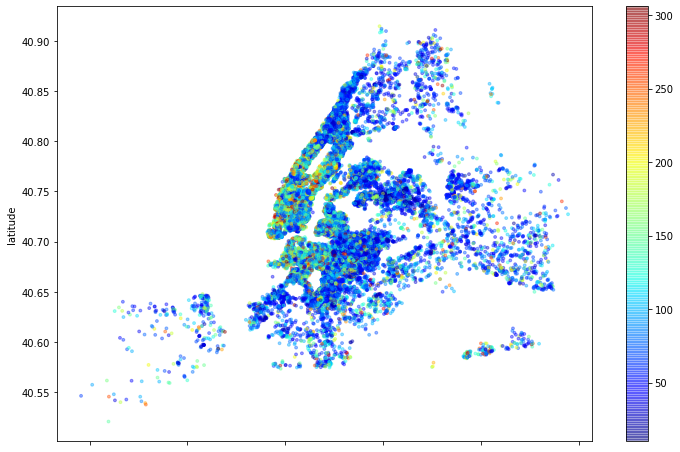

In [114]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

**Q7. Em qual Borough é mais caro de morar?**

A cidade de Nova Iorque abrange cinco divisões administrativas em nível de condados chamadas **boroughs**: *Bronx*, *Brooklyn*, *Manhattan*, *Queens* e *Staten Island*. Cada borough é coincidente com um respectivo condado do Estado de Nova Iorque. Vamos fazer uma análise espacial e procurar saber em qual borough é mais barato/caro de se morar.

In [116]:
#Renomear a coluna para se referir aos Boroughs
df_clean.rename(columns={'neighbourhood_group':'Boroname'}, inplace=True)

#### Plot Latitude-Longitude para os Borough

Vamos agora fazer um plot usando a latitude e longitude para mostrar como os dados estão dividios espacialmente.

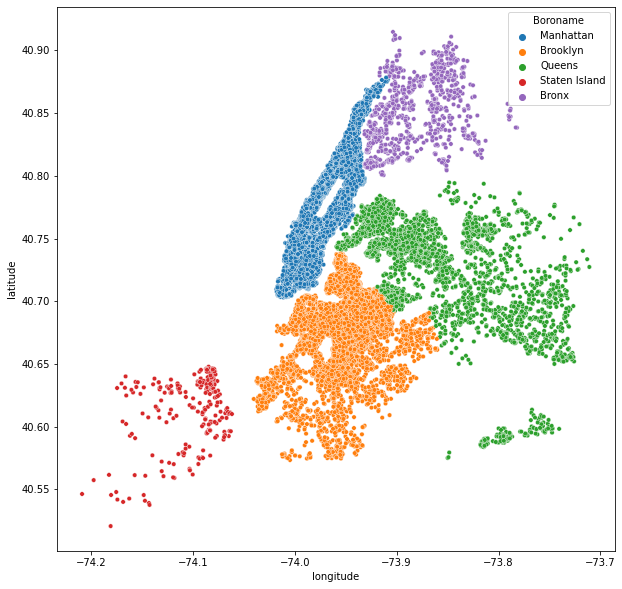

In [117]:
# plotar os imóveis pela latitude-longitude
plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude', hue='Boroname',s=20, data=df_clean);


Agora vamos ver quais distritos apresentam mais ofertas de imóveis.

In [118]:
# mostrar a quantidade imóveis disponíveis por distrito
df_clean['Boroname'].value_counts()

Manhattan        14773
Brooklyn         13767
Queens            4457
Bronx              907
Staten Island      265
Name: Boroname, dtype: int64

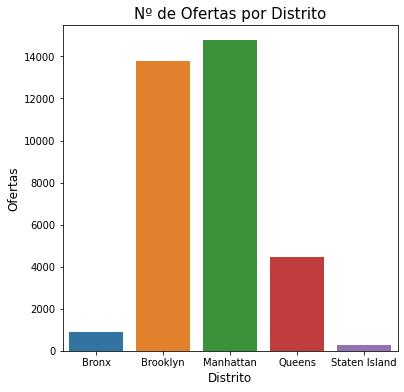

In [73]:
#Visualização gráfica
borough_count = df_clean.groupby('Boroname').agg('count').reset_index()

fig, ax1 = plt.subplots(1,1, figsize=(6,6))
sns.barplot(x='Boroname', y='id', data=borough_count, ax=ax1)

ax1.set_title('Nº de Ofertas por Distrito', fontsize=15)
ax1.set_xlabel('Distrito', fontsize=12)
ax1.set_ylabel('Ofertas', fontsize=12)
ax1.tick_params(axis='both', labelsize=10)

In [121]:
# mostrar a percentagem imóveis disponíveis por distrito
df_clean.Boroname.value_counts() / df_clean.shape[0]

Manhattan        0.432351
Brooklyn         0.402909
Queens           0.130440
Bronx            0.026545
Staten Island    0.007756
Name: Boroname, dtype: float64

In [61]:
#Média de Preço por Boroname
df_clean.groupby(['Boroname']).price.mean().sort_values(ascending=False)[:10]

Boroname
Manhattan        128.045421
Brooklyn         101.315319
Staten Island     92.030189
Queens            81.737267
Bronx             81.148842
Name: price, dtype: float64

In [120]:
#Número de ofertas por Borough
print('Nº de ofertas em Manhattan:{}'.format(df_clean[df_clean.Boroname == "Manhattan"].shape[0]))
print('Nº de ofertas em Brooklyn:{}'.format(df_clean[df_clean.Boroname == "Brooklyn"].shape[0]))
print('Nº de ofertas em Staten Island :{}'.format(df_clean[df_clean.Boroname == "Staten Island"].shape[0]))
print('Nº de ofertas em Queens:{}'.format(df_clean[df_clean.Boroname == "Queens"].shape[0]))
print('Nº de ofertas em Bronx:{}'.format(df_clean[df_clean.Boroname == "Bronx"].shape[0]))

Nº de ofertas em Manhattan:14773
Nº de ofertas em Brooklyn:13767
Nº de ofertas em Staten Island :265
Nº de ofertas em Queens:4457
Nº de ofertas em Bronx:907


Aqui podemos ver que *Manhattan* e *Brooklyn* apresentam a maior média de preço entre os distritos de Nova Iorque, o que condiz com a realidade, pois a maioria dos bairros mais caros apresentados anteriormente pertencem a esses dois distritos. 

Também podemos ver que *Staten Island* apresenta poucas ofertas o que pode levar a média a ser distorcida. Já que *Staten Island* é conhecida por ser o distrito mais desconhecido de Nova York. 

## Conclusões


Foi feita apenas uma análise superficial nesse DataSet mais simples do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis, no qual fizemos algumas limpezas para poder ter uma visão mais limpa sobre o conjunto de dados. 

* Também se notou que em algumas localidades há poucos imóveis disponíveis, o  que pode distorcer a média de preço por bairro. Ao retirarmos esses bairros, podemos ter uma noção melhor da distribuição do preço, e ver que tende aos bairros mais caros de Nova Iorque.

* Pudemos ver que 75% dos donos das casas preferem alugueis a partir de 1 mês. 

* Os mais populares são Casa/apartamento inteiros e quarto inteiro.

* Notamos com $109.71 dólares, podemos ter hospedagem em Nova Iorque dependendo do bairro.

* *Manhattan* e *Brooklyn* apresentam 83.5% das ofertas do Airbnb. Aonde apresentam também a média mais alta de preços.**negrito**

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.